# Caso practico: Seleccion de caracteristicas

En este caso de uso practico se presenta un mecanismo de seleccion de caracteristicas, mediante el uso de Random Forest.

## DataSet: Deteccion  de malware en Android 

Android malware dataset (CIC-AndMal2017)

We propose our new Android malware dataset here, named CICAndMal2017. In this approach, we run our both malware and benign applications on real smartphones to avoid runtime behaviour modification of advanced malware samples that are able to detect the emulator environment. We collected more than 10,854 samples (4,354 malware and 6,500 benign) from several sources. We have collected over six thousand benign apps from Googleplay market published in 2015, 2016, 2017.

We installed 5,000 of the collected samples (426 malware and 5,065 benign) on real devices. Our malware samples in the CICAndMal2017 dataset are classified into four categories:

    Adware
    Ransomware
    Scareware
    SMS Malware

Our samples come from 42 unique malware families. The family kinds of each category and the numbers of the captured samples are as follows:
Adware

    Dowgin family, 10 captured samples
    Ewind family, 10 captured samples
    Feiwo family, 15 captured samples
    Gooligan family, 14 captured samples
    Kemoge family, 11 captured samples
    koodous family, 10 captured samples
    Mobidash family, 10 captured samples
    Selfmite family, 4 captured samples
    Shuanet family, 10 captured samples
    Youmi family, 10 captured samples

Ransomware

    Charger family, 10 captured samples
    Jisut family, 10 captured samples
    Koler family, 10 captured samples
    LockerPin family, 10 captured samples
    Simplocker family, 10 captured samples
    Pletor family, 10 captured samples
    PornDroid family, 10 captured samples
    RansomBO family, 10 captured samples
    Svpeng family, 11 captured samples
    WannaLocker family, 10 captured samples

Scareware

    AndroidDefender 17 captured samples
    AndroidSpy.277 family, 6 captured samples
    AV for Android family, 10 captured samples
    AVpass family, 10 captured samples
    FakeApp family, 10 captured samples
    FakeApp.AL family, 11 captured samples
    FakeAV family, 10 captured samples
    FakeJobOffer family, 9 captured samples
    FakeTaoBao family, 9 captured samples
    Penetho family, 10 captured samples
    VirusShield family, 10 captured samples

SMS Malware

    BeanBot family, 9 captured samples
    Biige family, 11 captured samples
    FakeInst family, 10 captured samples
    FakeMart family, 10 captured samples
    FakeNotify family, 10 captured samples
    Jifake family, 10 captured samples
    Mazarbot family, 9 captured samples
    Nandrobox family, 11 captured samples
    Plankton family, 10 captured samples
    SMSsniffer family, 9 captured samples
    Zsone family, 10 captured samples

In order to acquire a comprehensive view of our malware samples, we created a specific scenario for each malware category. We also defined three states of data capturing in order to overcome the stealthiness of an advanced malware:

    Installation: The first state of data capturing which occurs immediately after installing malware (1-3 min).
    Before restart: The second state of data capturing which occurs 15 min before rebooting phones.
    After restart: The last state of data capturing which occurs 15 min after rebooting phones.

For feature Extraction and Selection, we captured network traffic features (.pcap files), and extracted more than 80 features by using CICFlowMeter-V3 during all three mentioned states (installation, before restart, and after restart). 
License

The CICAndMal2017 dataset is publicly available for researchers. If you are using our dataset, you should cite our related research paper that outlines the details of the dataset and its underlying principles:

    Arash Habibi Lashkari, Andi Fitriah A. Kadir, Laya Taheri, and Ali A. Ghorbani, “Toward Developing a Systematic Approach to Generate Benchmark Android Malware Datasets and Classification”, In the proceedings of the 52nd IEEE International Carnahan Conference on Security Technology (ICCST), Montreal, Quebec, Canada, 2018.

Download this dataset

[Descargar Dataset](https://www.unb.ca/cic/datasets/andmal2017.html)

    



## Imports

In [1]:

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score

# Homework
* 1.- Funciones Auxiliares(Particionado)
* 2.- Eliminación de etiquetas (Remove_Labels)
* 3.- Lectura del DataSet
* 4.- Visualización del DataSet(head,descriibe,info)
* 5.- Divición del DataSet

### Funciones Auxiliares

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name): # esto hace separar el dataframe la etiqueta label_name, la va asiganar y generar en otro dataset por separado
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## 1.-Lectura del DataSet

In [4]:
df = pd.read_csv('/home/marco/Documentos/ZZZ/datasets/TotalFeatures-ISCXFlowMeter.csv')

## 2.- Visualización del DataSet

In [5]:
df.head(10) # visualizamos las primeras 10 filas del dataset

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.0,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.0,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.0,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.0,2,155136,31232,5,4,32,benign
5,261876,7,6,1618,882,52,52,730,477,231.142857,...,0.0,-1,0.0,2,4194240,926720,3,7,32,benign
6,14,2,0,104,0,52,-1,52,-1,52.000000,...,0.0,-1,0.0,3,5824,-1,0,2,32,benign
7,29675,1,1,71,213,71,213,71,213,71.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
8,806635,4,0,239,0,52,-1,83,-1,59.750000,...,0.0,-1,0.0,5,107008,-1,0,4,32,benign
9,56620,3,2,1074,719,52,52,592,667,358.000000,...,0.0,-1,0.0,3,128512,10816,1,3,32,benign


In [6]:
df.describe()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,min_idle,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward
count,6.319550e+05,631955.000000,631955.000000,6.319550e+05,6.319550e+05,631955.000000,631955.000000,631955.000000,631955.000000,631955.000000,...,6.319550e+05,6.319550e+05,6.319550e+05,6.319550e+05,631955.000000,6.319550e+05,6.319550e+05,631955.000000,631955.00000,631955.000000
mean,2.195245e+07,6.728514,10.431934,9.540172e+02,1.206042e+04,141.475727,44.357688,263.675901,183.248084,174.959706,...,1.997327e+07,2.031228e+07,2.075238e+07,4.663875e+05,2.360896,9.620796e+05,3.104519e+05,9.733144,6.72471,19.965713
std,1.900578e+08,174.161354,349.424019,8.235040e+04,4.824716e+05,157.680880,89.099554,289.644383,371.863224,162.024811,...,1.897986e+08,1.897902e+08,1.899721e+08,6.199704e+06,3.041810,1.705655e+06,6.647956e+05,347.877923,174.13813,14.914261
min,-1.800000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,0.000000,0.00000,0.000000
25%,0.000000e+00,1.000000,0.000000,6.900000e+01,0.000000e+00,52.000000,-1.000000,52.000000,-1.000000,52.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,0.000000e+00,-1.000000e+00,0.000000,1.00000,0.000000
50%,2.445000e+04,1.000000,0.000000,1.840000e+02,0.000000e+00,52.000000,-1.000000,83.000000,-1.000000,83.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,8.761600e+04,-1.000000e+00,0.000000,1.00000,32.000000
75%,1.759751e+06,3.000000,1.000000,4.270000e+02,1.670000e+02,108.000000,52.000000,421.000000,115.000000,356.000000,...,1.013498e+06,1.291379e+06,1.306116e+06,0.000000e+00,2.000000,3.046400e+05,9.049600e+04,1.000000,3.00000,32.000000
max,4.431076e+10,48255.000000,74768.000000,4.049644e+07,1.039222e+08,1390.000000,1390.000000,1500.000000,1390.000000,1390.000000,...,4.431072e+10,4.430000e+10,4.431072e+10,8.470000e+08,2269.000000,4.194240e+06,4.194240e+06,74524.000000,48255.00000,44.000000


In [7]:
# Sacar las Categorias
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631955 entries, 0 to 631954
Data columns (total 80 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 631955 non-null  int64  
 1   total_fpackets           631955 non-null  int64  
 2   total_bpackets           631955 non-null  int64  
 3   total_fpktl              631955 non-null  int64  
 4   total_bpktl              631955 non-null  int64  
 5   min_fpktl                631955 non-null  int64  
 6   min_bpktl                631955 non-null  int64  
 7   max_fpktl                631955 non-null  int64  
 8   max_bpktl                631955 non-null  int64  
 9   mean_fpktl               631955 non-null  float64
 10  mean_bpktl               631955 non-null  float64
 11  std_fpktl                631955 non-null  float64
 12  std_bpktl                631955 non-null  float64
 13  total_fiat               631955 non-null  int64  
 14  tota

## 3.- División del DataSet

In [8]:
# Copiar el DataSet y Transformarlo la variable de salida a númerica
X = df.copy()
# Division del DataSet
train_set, val_set, test_set = train_val_test_split(df)

In [9]:
X_train, y_train = remove_labels(train_set, 'calss')
X_val, y_val = remove_labels(val_set, 'calss')
X_test, y_test = remove_labels(test_set, 'calss')
# remove_labels la vas a separara y vas a usar la etiqueta, dando que el df traiga solo calss y haya menos consumo de hardware

# 4.- Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier


clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Predecir con el DataSet  de validación

y_pred = clf_rnd.predict(X_val)

In [12]:
print("F1_score", f1_score(y_pred, y_val, average='weighted'))
# f1 score: validar el rendimiento del modelo

F1_score 0.9321350200628268


## 5.- Importancia de las características 

In [13]:
clf_rnd.feature_importances_

array([0.03148474, 0.00447086, 0.00355324, 0.02287126, 0.01121304,
       0.01725066, 0.00933473, 0.0214129 , 0.01070152, 0.02036135,
       0.01232613, 0.01051379, 0.00522225, 0.01905194, 0.00459829,
       0.01360064, 0.00596092, 0.01764871, 0.00500794, 0.01829403,
       0.00468597, 0.00595802, 0.00276679, 0.00953712, 0.00590933,
       0.        , 0.        , 0.00287043, 0.00402655, 0.02736208,
       0.01791751, 0.02924532, 0.02833102, 0.02540786, 0.01716949,
       0.02337682, 0.01503398, 0.019862  , 0.03657175, 0.02918993,
       0.00832129, 0.03273876, 0.00610444, 0.00374368, 0.01128868,
       0.00891973, 0.        , 0.        , 0.        , 0.01230706,
       0.01945172, 0.01976295, 0.00334435, 0.00118137, 0.00076241,
       0.00102501, 0.00499646, 0.01028637, 0.00267208, 0.00155135,
       0.00243639, 0.00269669, 0.0095307 , 0.00235958, 0.00207977,
       0.00916491, 0.00897294, 0.01111258, 0.00177268, 0.01228588,
       0.00814881, 0.00937185, 0.00173232, 0.00154932, 0.14223

In [14]:
# Es posible extraer carcterísticas qeu son más importantes para la correcta clasificación de los dato.

feature_importances = {name:score for name, score in zip(list(df), clf_rnd.feature_importances_)}

In [15]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

Init_Win_bytes_forward     0.142233
max_flowiat                0.036572
flow_fin                   0.032739
Init_Win_bytes_backward    0.032202
duration                   0.031485
flowPktsPerSecond          0.029245
mean_flowiat               0.029190
flowBytesPerSecond         0.028331
fPktsPerSecond             0.027362
min_flowpktl               0.025408
mean_flowpktl              0.023377
total_fpktl                0.022871
max_fpktl                  0.021413
mean_fpktl                 0.020361
min_flowiat                0.019862
fAvgSegmentSize            0.019763
avgPacketSize              0.019452
total_fiat                 0.019052
mean_fiat                  0.018294
bPktsPerSecond             0.017918
dtype: float64

## Reducción del número de características 

In [16]:
# Extraer las 10 características con más relevancia para el algoritmo 
columns = list(feature_importances_sorted.head(10).index)
columns


['Init_Win_bytes_forward',
 'max_flowiat',
 'flow_fin',
 'Init_Win_bytes_backward',
 'duration',
 'flowPktsPerSecond',
 'mean_flowiat',
 'flowBytesPerSecond',
 'fPktsPerSecond',
 'min_flowpktl']

In [17]:
X_train_reduced =X_train[columns].copy()
X_val_reduced = X_val[columns].copy()

In [18]:
X_train_reduced.head(10)

,Init_Win_bytes_forward,max_flowiat,flow_fin,Init_Win_bytes_backward,duration,flowPktsPerSecond,mean_flowiat,flowBytesPerSecond,fPktsPerSecond,min_flowpktl
508881,0,490,0,0,490,4081.632653,4.900000e+02,679591.836700,2040.816327,73
208326,0,-1,0,-1,0,0.000000,0.000000e+00,0.000000,0.000000,422
107213,0,-1,0,-1,0,0.000000,0.000000e+00,0.000000,0.000000,436
466726,0,23933,0,0,23933,83.566623,2.393300e+04,21267.705680,41.783312,54
230085,0,-1,0,-1,0,0.000000,0.000000e+00,0.000000,0.000000,422
472961,4194240,60224201,1,1145472,60365946,0.132525,8.623707e+06,22.993096,0.066263,52
482372,62912,212,1,-1,212,9433.962264,2.120000e+02,636792.452800,9433.962264,52
619993,107008,30839880,2,-1,30839880,0.064851,3.080000e+07,5.382641,0.064851,83
65344,0,-1,0,-1,0,0.000000,0.000000e+00,0.000000,0.000000,436
46666,0,-1,0,-1,0,0.000000,0.000000e+00,0.000000,0.000000,365


In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_reduced, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Predecir con el DataSet  de validación

y_pred = clf_rnd.predict(X_val_reduced)

In [21]:
print("F1_score", f1_score(y_pred, y_val, average='weighted'))
# f1 score: validar el rendimiento del modelo

F1_score 0.9270284473268133


COmo puede observarse en la casilla anterior del rendimiento de nuestro modeo empeora muy poco, eliminando 69 de las 79 características de las que se disponía. Por otro lado, el rendimiento en el entrenamiento y en la predicción mejora sustancialmente

In [22]:
# desplegado para la siguiente clase con django. 
# acuracy 
# f1 score
# subir el dataset en hybrid.

## GRAFICO Y ARBOL

In [23]:
## 7. Codificación y Normalización de Etiquetas (Versión Final)

# 1. Aseguramos que y_train, y_val, y_test sean Series de Pandas con tipo de dato 'string' (object)
# Forzamos la conversión a string para que el accessor .str funcione.

y_train_str = y_train.astype(str)
y_val_str = y_val.astype(str)
y_test_str = y_test.astype(str)


# 2. Normalizar las etiquetas (limpiar espacios y minúsculas)
print("Realizando limpieza y normalización de etiquetas...")
y_train_str = y_train_str.str.strip().str.lower()
y_val_str = y_val_str.str.strip().str.lower()
y_test_str = y_test_str.str.strip().str.lower()


# 3. Normalizar el DataFrame completo para obtener las clases únicas limpias
# Esto garantiza que el diccionario de mapeo sea robusto.
df['calss_norm'] = df['calss'].astype(str).str.strip().str.lower()
unique_classes_norm = df['calss_norm'].unique()

class_to_int = {name: i for i, name in enumerate(unique_classes_norm)}
print(f"Mapeo de Clases Normalizado: {class_to_int}")


# 4. Aplicar el mapeo a las etiquetas normalizadas
y_train = y_train_str.map(class_to_int)
y_val = y_val_str.map(class_to_int)
y_test = y_test_str.map(class_to_int)

print(f"Número de NaN en y_train después del mapeo: {y_train.isna().sum()}")


# 5. Reducir X_train (asegurar definición para el siguiente bloque)
# Asumiendo que X_train existe en el kernel.
X_train_reduced_2d = X_train[['min_flowpktl', 'flow_fin']]

Realizando limpieza y normalización de etiquetas...
Mapeo de Clases Normalizado: {'benign': 0, 'asware': 1, 'generalmalware': 2}
Número de NaN en y_train después del mapeo: 0


In [24]:
## Re-ejecutar 3.- División del DataSet
# (Asumiendo que df está cargado y las funciones están definidas)

train_set, val_set, test_set = train_val_test_split(df)
X_train, y_train = remove_labels(train_set, 'calss')
X_val, y_val = remove_labels(val_set, 'calss')
X_test, y_test = remove_labels(test_set, 'calss')

# --- Verificación Crítica ---
print("Tamaño de train_set (completo):", train_set.shape)
print("Tamaño de X_train (características):", X_train.shape)
print("Tamaño de y_train (etiquetas):", y_train.shape)
print("Primeras 5 etiquetas en y_train:", y_train.head())

Tamaño de train_set (completo): (379173, 81)
Tamaño de X_train (características): (379173, 80)
Tamaño de y_train (etiquetas): (379173,)
Primeras 5 etiquetas en y_train: 508881    benign
208326    benign
107213    benign
466726    benign
230085    benign
Name: calss, dtype: object


In [25]:
# --- Bloque de Normalización y Mapeo (FINAL CORREGIDO) ---

y_train_str = y_train.astype(str)
y_val_str = y_val.astype(str)
y_test_str = y_test.astype(str)

y_train_str = y_train_str.str.strip().str.lower()
y_val_str = y_val_str.str.strip().str.lower()
y_test_str = y_test_str.str.strip().str.lower()

df['calss_norm'] = df['calss'].astype(str).str.strip().str.lower()
unique_classes_norm = df['calss_norm'].unique()
class_to_int = {name: i for i, name in enumerate(unique_classes_norm)}

y_train = y_train_str.map(class_to_int)
y_val = y_val_str.map(class_to_int)
y_test = y_test_str.map(class_to_int)

print(f"Tamaño de y_train después de mapeo: {y_train.shape}")

Tamaño de y_train después de mapeo: (379173,)


In [26]:
# --- Bloque de Entrenamiento Final (Sección 6) ---

# 1. Re-definición de las 2 Características de Entrenamiento (Debe hacerse después de la limpieza)
X_train_reduced_2d = X_train[['min_flowpktl', 'flow_fin']].copy()

# 2. Limpieza de NaN y Alineación (Protección final)
nan_indices = y_train[y_train.isna()].index

if len(nan_indices) > 0:
    X_train_reduced_2d = X_train_reduced_2d.drop(nan_indices, errors='ignore')
    y_train = y_train.drop(nan_indices)

# 3. Alineación (CRÍTICO)
X_train_reduced_2d = X_train_reduced_2d.loc[y_train.index]

# Verificación de tamaño
if X_train_reduced_2d.shape[0] == 0:
    raise ValueError("¡ERROR FATAL! El índice de X_train_reduced_2d no coincide con y_train y se vació.")

# 4. Entrenamiento
from sklearn.ensemble import RandomForestRegressor
reg_tree_reduced = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
reg_tree_reduced.fit(X_train_reduced_2d, y_train)

print("✅ ¡Modelo de Regresión Forest entrenado exitosamente!")

✅ ¡Modelo de Regresión Forest entrenado exitosamente!


/home/marco/Documentos/api_tecnicas_seleccion/Tecnicas_Seleccion_Caracteristicas/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


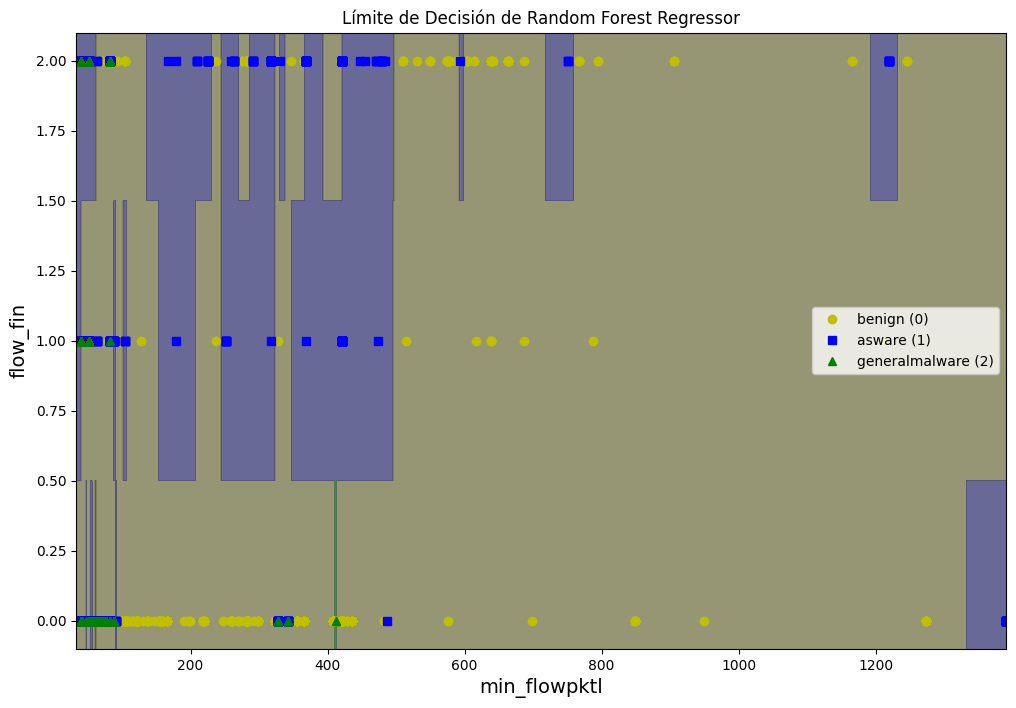

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de haber ejecutado la definición de la función plot_decision_boundary
# en una celda anterior.

def plot_decision_boundary(reg, X, y, plot_training=True, resolution=1000):
    # Convertir a numpy array para la función de ploteo
    X_np = X.values if hasattr(X, 'values') else X
    
    mins = X_np.min(axis=0) - 0.1 
    maxs = X_np.max(axis=0) + 0.1 
    x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), 
                         np.linspace(mins[1], maxs[1], resolution))
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Predicción y redondeo para mapear el valor continuo a clases (0, 1, 2)
    y_pred_cont = reg.predict(X_new)
    # Clip a 0 y 2 porque solo tienes 3 clases (0, 1, 2)
    y_pred_rounded = np.round(y_pred_cont).astype(int).clip(0, 2) 

    # Definición de Custom Colormap (basado en tus 3 clases: 0, 1, 2)
    colors_fill = ['#fafab0', '#9898ff', '#a0faa0'] # Amarillo, Azul, Verde
    colors_contour = ['#7d7d58', '#4c4c7f', '#507d50'] 
    
    custom_cmap_fill = ListedColormap(colors_fill[:len(np.unique(y_pred_rounded))])
    custom_cmap_contour = ListedColormap(colors_contour[:len(np.unique(y_pred_rounded))])

    plt.contourf(x1, x2, y_pred_rounded.reshape(x1.shape), alpha=0.3, cmap=custom_cmap_fill)
    plt.contourf(x1, x2, y_pred_rounded.reshape(x1.shape), alpha=0.8, cmap=custom_cmap_contour)
    
    if plot_training:
        # Puntos de entrenamiento (Ajustado para 3 clases)
        plt.plot(X_np[:, 0][y == 0], X_np[:, 1][y == 0], 'yo', label='benign (0)')
        plt.plot(X_np[:, 0][y == 1], X_np[:, 1][y == 1], 'bs', label='asware (1)')
        plt.plot(X_np[:, 0][y == 2], X_np[:, 1][y == 2], 'g^', label='generalmalware (2)')
        plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
        
    plt.xlabel(X.columns[0], fontsize=14)
    plt.ylabel(X.columns[1], fontsize=14)
    plt.title('Límite de Decisión de Random Forest Regressor')
    plt.legend()


plt.figure(figsize=(12, 8))
plot_decision_boundary(reg_tree_reduced, X_train_reduced_2d, y_train)
plt.show()

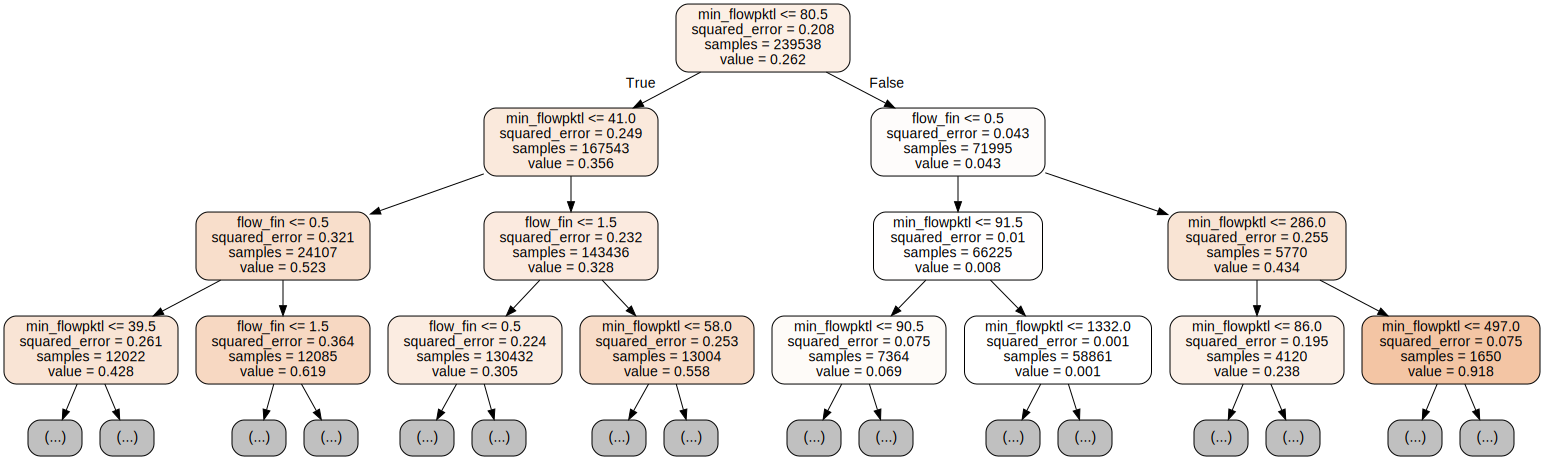

In [30]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

# Extraemos el primer árbol (el índice [0])
tree_to_visualize = reg_tree_reduced.estimators_[0]

export_graphviz(
    tree_to_visualize,
    out_file='android_malware_reg.dot', 
    feature_names=X_train_reduced_2d.columns,
    rounded=True,
    filled=True,
    max_depth=3 # Limitado para que sea legible
)

# Renderizar el archivo .dot
Source.from_file('android_malware_reg.dot')